In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

data = pd.read_csv("C:/Users/stunt/OneDrive/Desktop/UCLA Material/Course Material/Machine Learning/Assignments/Wk1/imports-85 (1).csv")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


[Text(0.5, 0, 'Horsepower'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Price vs. Horsepower and Body Style')]

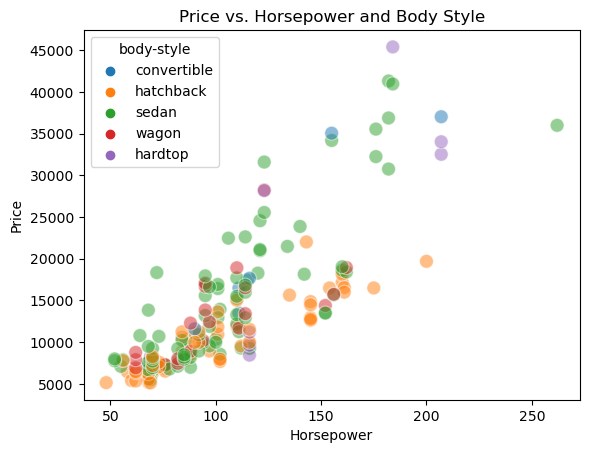

In [3]:
data['lnprice'] = np.log(data.price) 
data['pricesq'] = data.price**2
# Plot price over horespower and body style
plt.figure()
ax=sns.scatterplot(x	= "horsepower",
y	= "price", data = data, color = "blue",
hue	= "body-style", alpha = 0.5,
s	= 100)
ax.set(xlabel = 'Horsepower', ylabel = 'Price',
title	= "Price vs. Horsepower and Body Style")

[Text(0.5, 0, 'Horsepower'),
 Text(0, 0.5, 'LnPrice'),
 Text(0.5, 1.0, 'Log-Price vs. Horsepower and Body Style')]

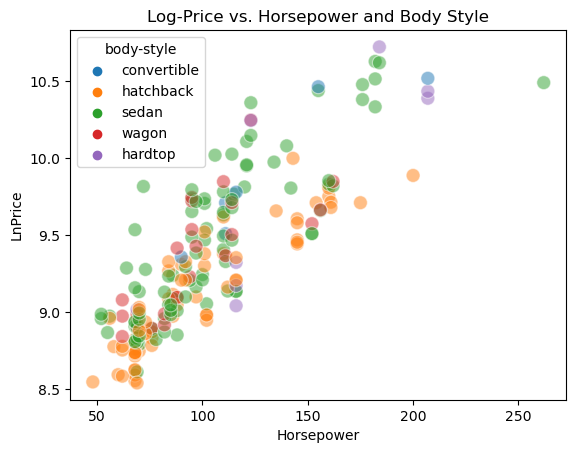

In [5]:
plt.figure()
ax=sns.scatterplot(x = "horsepower",
y = "lnprice",
data = data,
color = "blue",
hue = "body-style",
alpha = 0.5, s = 100)
ax.set(xlabel = 'Horsepower',
ylabel = 'LnPrice',
title = "Log-Price vs. Horsepower and Body Style")

[Text(0.5, 0, 'Horsepower'),
 Text(0, 0.5, '$Price^2$'),
 Text(0.5, 1.0, '$Price^2$ vs. Horsepower and Body Style')]

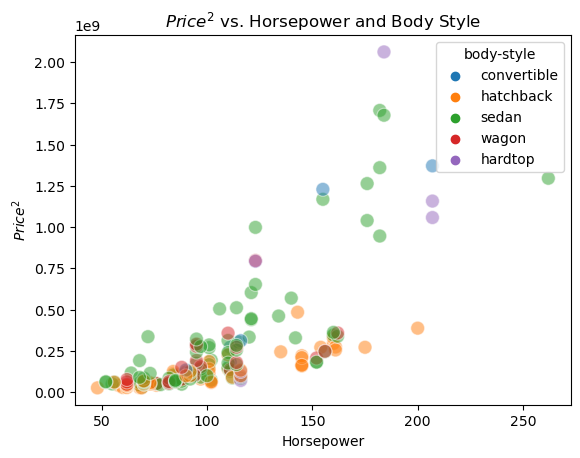

In [6]:
plt.figure()
ax=sns.scatterplot(x = "horsepower",
y = "pricesq",
data = data,
color = "blue",
hue = "body-style",
alpha = 0.5,
s = 100)
ax.set(xlabel = 'Horsepower',
ylabel = '$Price^2$', title = "$Price^2$ vs. Horsepower and Body Style")

## Regression and Error Diagnostics

In [8]:
import statsmodels.formula.api as sm
from seaborn_qqplot import pplot
from scipy.stats import norm
# Regression
data = data.rename(columns={'body-style': 'bodystyle'})

res = sm.ols(formula='lnprice~horsepower + bodystyle',data=data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     115.9
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           3.55e-56
Time:                        15:12:03   Log-Likelihood:                -7.6882
No. Observations:                 199   AIC:                             27.38
Df Residuals:                     193   BIC:                             47.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8

[Text(0.5, 0, 'Fitted values'),
 Text(0, 0.5, 'Residuals'),
 Text(0.5, 1.0, 'Residual plot')]

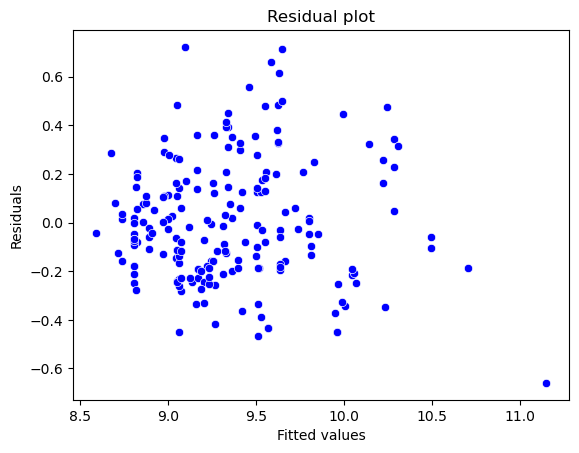

In [9]:
plt.figure()
ax=sns.scatterplot(x = res.fittedvalues,
y = res.resid,
color = "blue")
ax.set(xlabel = 'Fitted values',
ylabel = 'Residuals',
title = 'Residual plot')

[Text(0.5, 1.0, 'Residuals Histogram'), Text(0.5, 0, 'Residuals')]

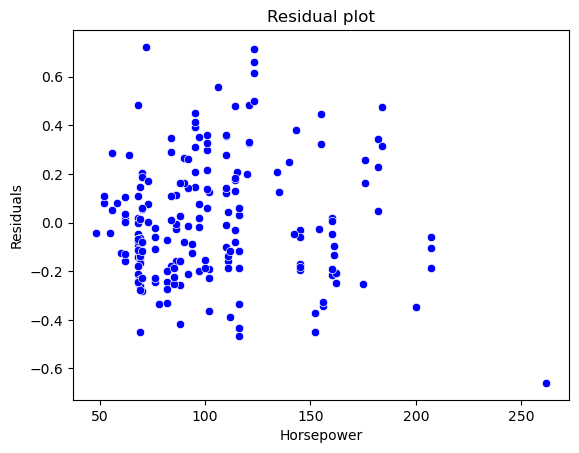

<Figure size 640x480 with 0 Axes>

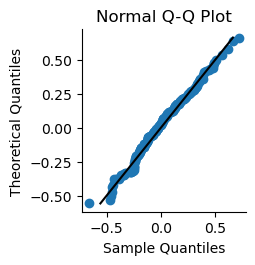

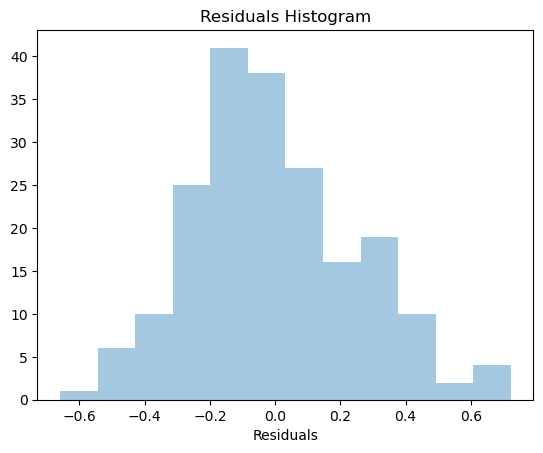

In [14]:
plt.figure()
ax=sns.scatterplot(x = data.horsepower,
y = res.resid,
color = "blue")
ax.set(xlabel = 'Horsepower',
ylabel = 'Residuals',
title = 'Residual plot')

residuals=pd.DataFrame({'resid':res.resid})
plt.figure()
ax = pplot(data=residuals,
x='resid',
y=norm,
kind='qq',
display_kws={"identity":True})
ax.set(ylabel = 'Theoretical Quantiles',
xlabel = 'Sample Quantiles',
title = 'Normal Q-Q Plot')

plt.figure()
ax = sns.distplot(residuals.resid,kde=False)
ax.set(title = 'Residuals Histogram',xlabel='Residuals')

                            OLS Regression Results                            
Dep. Variable:                citympg   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     366.5
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           3.49e-47
Time:                        15:14:30   Log-Likelihood:                -564.37
No. Observations:                 203   AIC:                             1133.
Df Residuals:                     201   BIC:                             1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1031      0.775     50.482      0.0

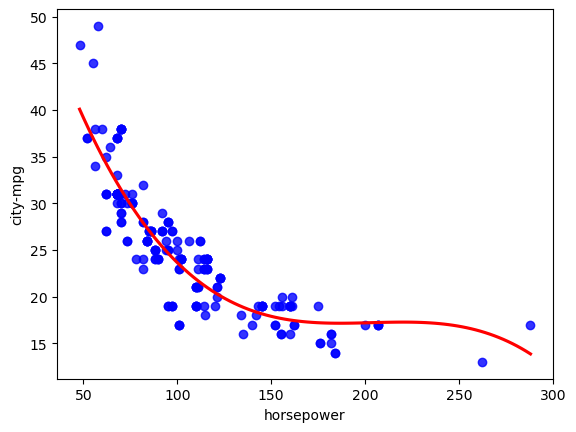

In [16]:
plt.figure()
ax = sns.regplot(x = "horsepower",
y = "city-mpg",
data = data,
scatter_kws={"color": "blue"},
line_kws={"color": "red"},
fit_reg=True,
order = 3,
ci = None)

# Regress fuel efficiency on horespower
data = data.rename(columns={'city-mpg': 'citympg'})
res = sm.ols(formula='citympg~horsepower',data=data).fit()
print(res.summary())

## Non Linear relations

In [25]:
# Load data

StockRetAcct_DT = pd.read_csv("C:/Users/stunt/OneDrive/Desktop/UCLA Material/Course Material/Machine Learning/Assignments/Wk2/StockRetAcct_DT (1).csv")
# Excess return
StockRetAcct_DT['ExRet']=np.exp(StockRetAcct_DT.lnAnnRet)- \
np.exp(StockRetAcct_DT.lnRf)
# Due to winsorizing of original data, we add a tiny amount of noise (jitter) to lnIssue, lnBM, and lnME before creating by year deciles/quintiles this is to avoid ties in the quantile sorts
StockRetAcct_DT['lnIssue']=StockRetAcct_DT['lnIssue'] +\
np.random.normal(0,1/50,len(StockRetAcct_DT['lnIssue']))
StockRetAcct_DT['lnBM']=StockRetAcct_DT['lnBM'] +\
np.random.normal(0,1/50,len(StockRetAcct_DT['lnBM']))
StockRetAcct_DT['lnME']=StockRetAcct_DT['lnME'] +\
np.random.normal(0,1/50,len(StockRetAcct_DT['lnME']))
# Decile sorts based on lnIssue
StockRetAcct_DT['lnIssuePf'] = StockRetAcct_DT.groupby(['year'])['lnIssue'].transform(
lambda x: pd.qcut(x, 10, labels = range(1, 11)))
# Value-weight across stock
StockRetAcct_DT['ret_num'] = StockRetAcct_DT['ExRet']*StockRetAcct_DT['MEwt'] 
# Compute the numerator
ISSUE_MutualFunds_yr = StockRetAcct_DT.groupby(['year','lnIssuePf'])['ret_num','MEwt'].sum()
ISSUE_MutualFunds_yr['ExRet'] = ISSUE_MutualFunds_yr['ret_num']/ISSUE_MutualFunds_yr['MEwt']
# Equql-weight across year
ISSUE_MutualFunds = ISSUE_MutualFunds_yr.groupby(['lnIssuePf'])['ExRet'].mean()
ISSUE_MutualFunds

lnIssuePf
1     0.110854
2     0.081954
3     0.078995
4     0.081271
5     0.089098
6     0.094406
7     0.087089
8     0.060027
9     0.079488
10    0.035841
Name: ExRet, dtype: float64

Text(0.5, 1.0, 'VW Firm Issuance Deciles vs. Excess Returns')

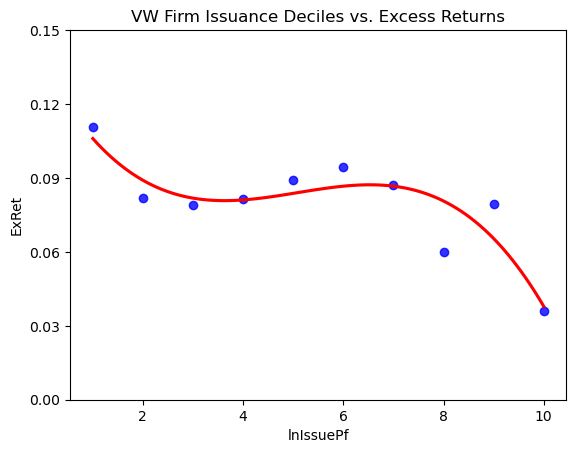

In [28]:
plt.figure()
ax=sns.regplot (x = ISSUE_MutualFunds.index ,
y = ISSUE_MutualFunds,
scatter_kws={"color": "blue"},
line_kws={"color": "red"},
fit_reg=True,
order = 3,
ci = None)
plt.yticks(np.arange(0, 0.16, 0.03))
plt.title('VW Firm Issuance Deciles vs. Excess Returns')

## Fama MacBeth Regressions

In [30]:
# Assign -1, 0, 1
StockRetAcct_DT['dummy1'] = StockRetAcct_DT['lnIssuePf'] == 1 # Dummy for Decile 1
StockRetAcct_DT['dummy1'] = StockRetAcct_DT['dummy1'].astype('int') 
# bool to int
StockRetAcct_DT['dummy10'] = StockRetAcct_DT['lnIssuePf'] == 10 # Dummy for Decile 10
StockRetAcct_DT['dummy10'] = StockRetAcct_DT['dummy10'].astype('int') # bool to int
StockRetAcct_DT['lnIssueTriple'] = StockRetAcct_DT['dummy10'] - StockRetAcct_DT['dummy1']

def ols_coef(x,formula):
    return sm.ols(formula,data=x).fit().params
gamma = (StockRetAcct_DT.groupby('year').apply(ols_coef,
'ExRet ~ lnIssueTriple'))
print('Mean Return: '+ str(gamma['lnIssueTriple'].mean()),
'Std Dev: '+ str(gamma['lnIssueTriple'].std()),
'Sharpe Ratio '+ str(gamma['lnIssueTriple'].mean()/
gamma['lnIssueTriple'].std()),
't-stat: '+ str(34**.5*(gamma['lnIssueTriple'].mean())/
gamma['lnIssueTriple'].std()), sep="\n")

Mean Return: -0.034629832475656375
Std Dev: 0.06000749807600188
Sharpe Ratio -0.577091756630085
t-stat: -3.3649942718217978


## Double Sorts and Functional Forms

bm           1         2         3         4         5
size                                                  
1     0.049618  0.078063  0.097884  0.101505  0.123384
2     0.050100  0.083239  0.098961  0.114586  0.098519
3     0.071433  0.084960  0.092493  0.103981  0.119135
4     0.097918  0.078629  0.091873  0.094899  0.101066
5     0.087626  0.073146  0.070655  0.073905  0.083642


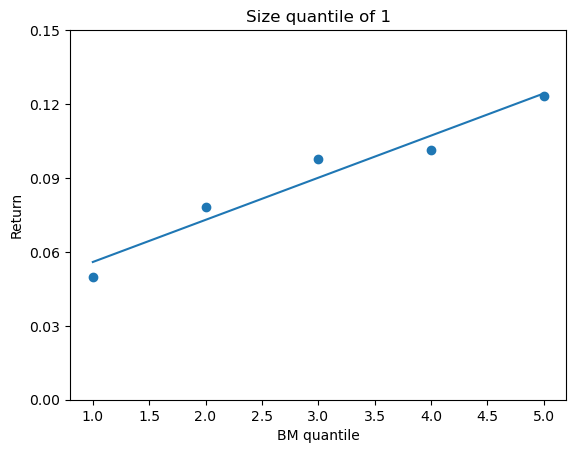

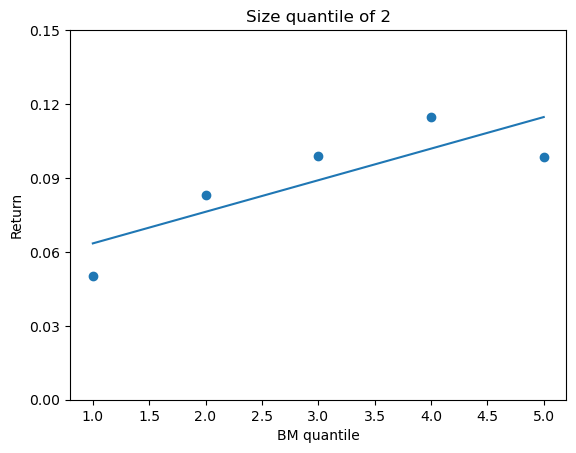

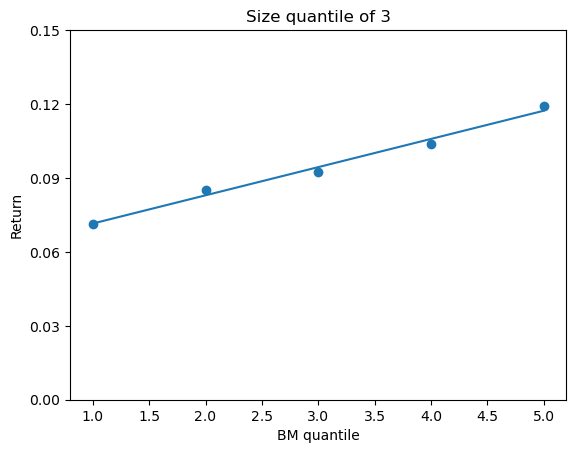

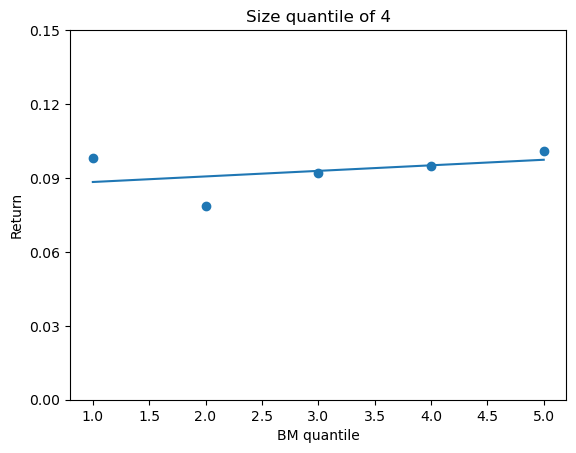

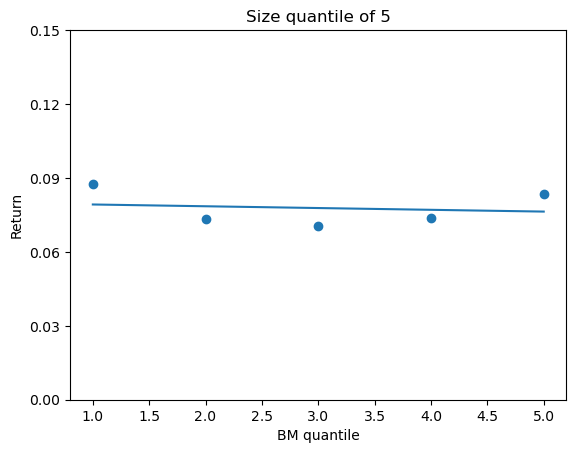

In [33]:
StockRetAcct_DT['size'] = StockRetAcct_DT.groupby(['year'])['lnME'].transform(
lambda x: pd.qcut(x, 5, labels = range(1, 6)))
StockRetAcct_DT['bm'] = StockRetAcct_DT.groupby(['year'])['lnBM'].transform(
lambda x: pd.qcut(x, 5, labels = range(1, 6)))

# Value-weight across stock
EW_Double_MutualFunds_yr = StockRetAcct_DT.groupby(['year','size','bm'])['ret_num', 'MEwt'].sum()
EW_Double_MutualFunds_yr['ExRet'] = EW_Double_MutualFunds_yr['ret_num']/EW_Double_MutualFunds_yr['MEwt']
# Equql-weight across year
EW_Double_MutualFunds = EW_Double_MutualFunds_yr.groupby(['size','bm'])['ExRet'].mean().unstack()
print(EW_Double_MutualFunds)

for i in range(5):
    plt.scatter([i for i in range(1,6)],EW_Double_MutualFunds.iloc[i])
    x = np.array ([i for i in range(1,6)])
    y = np.array(EW_Double_MutualFunds.iloc[i])
    fit = np.poly1d(np.polyfit(x, y, 1))
    plt.plot([i for i in range(1,6)], fit([i for i in range(1,6)]))
    plt.yticks(np.arange(0, 0.16, 0.03))
    plt.xlabel("BM quantile")
    plt.ylabel("Return")
    plt.title("Size quantile of " + str(i+1))
    plt.show()

5 plots suggest that value effect is prevalent among small firms. That is, we do not see a strong
linear relationship between stock return and book-to-market ratio among large firms. Thus, the
conditional linearity assumption (that expected returns are linear in the size ratio as well as the
interaction between BM and size) seems to be a pretty good assumption. 


We can see this assumption more clearly as follows,
Et[Re it+1] = λ0+λtlnBMit = λ0+(λ1+λ2lnMEit)lnBMit = λ0+λ1lnBMit+λ2lnMEit×lnBMit,
where λ1 is likely to be postive (value effect) and λ2 is likely to be negative (size effect from small
firms)